In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import random

## Image Show Modules (cv and matplotlib)

In [27]:
def cv_show(im,msg):
    cv2.imshow(msg,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()	

In [28]:
def plt_show(im):
    plt.axis("off")
    plt.imshow(im, cmap="gray")
    plt.show()
    

## Image Histogram

In [29]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

## Intermean Method to repeat calculate mean values between 2 histogram groups

In [30]:
def intermean(hist, t, st, en):
    tot = np.sum(hist[st:en])
    prob = hist/tot
    w0 = np.sum(prob[st:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:en])
    w1 = (1 - w0) +  + 0.0000001
    i0 = np.array([i for i in range(st,t+1)])
    i1 = np.array([i for i in range(t+1, en)])
    u0 = np.sum(i0*prob[st:t+1])/w0
    u1 = np.sum(i1*prob[t+1:en])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)    

## Main Process
1. Read Image

In [31]:
img = cv2.imread("./images/gray.png", 0)

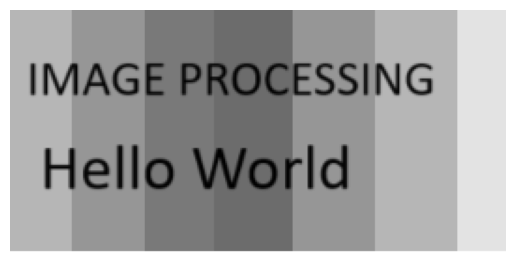

In [32]:
plt_show(img)

In [33]:
hist = hist_img_v0(img)

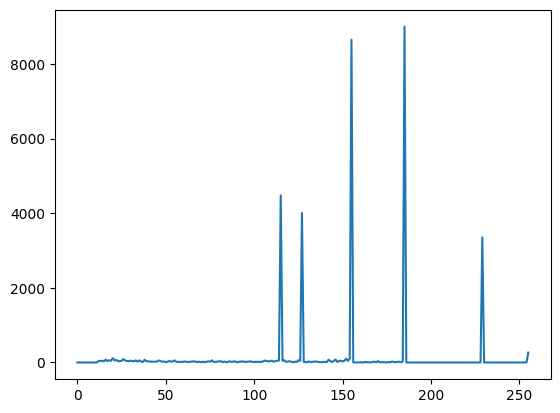

In [34]:
plt.plot(hist)
plt.savefig('./outs/graphs.png')

In [35]:
tol = 1
st, en = 0, 256
for t in range(2):
    flag = True
    T = []
    #t0 = random.randint(st, en)
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist[st:en], t0, st, en)
        T.append(t1)
        #print(t0, t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    en = thr+1
    print(T, thr)
    

[128, 141, 141] 141
[71, 76, 78, 78] 78


In [36]:
out = np.zeros_like(img)
out[img <= thr ] = 0
out[img > thr] = 255

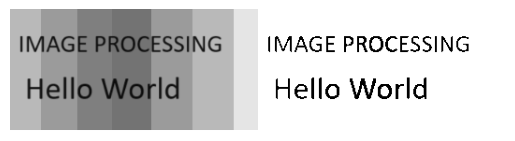

In [37]:
imgs = cv2.hconcat([img, out])
plt_show(imgs)